## Задача 1

1. $\lim \limits_{k \rightarrow +\infty} \dfrac{r_{k+1}}{r_k} = 0,707 < 1$ -- линейная скорость сходимости по тесту отношений. 
Также эта последовательность удовлетворяет определению линейной сходимости, т.к. мы можем подобрать константу $C = 1$, что $r_k = 0.707^k \leqslant C\cdot q^k$, где $q=0.707$.
2. Квадратичная скорость сходимости, т.к. удовлетворяет определению: $\exists C = 1$, такое, что для любого достаточно большого $k$:$r_{k+1} = 0,707^{2^{k+1}} \leqslant Cr_k^2 = ({0,707^2}^k)^2 $. 
3. $\lim \limits_{k \rightarrow +\infty} \dfrac{r_{k+1}}{r_k} = \lim \limits_{k \rightarrow +\infty} \dfrac{k^2}{(k+1)^2} = 1$ -- сублинейная скорость сходимости по тесту отношений.
4. $\lim \limits_{k \rightarrow +\infty} \dfrac{r_{k+1}}{r_k} = \lim \limits_{k \rightarrow +\infty} \dfrac{k!}{(k+1)!} = 0$ -- сверхлинейная скорость сходимости по тесту отношений.
5. $\lim\limits_{k \rightarrow + \infty} (\frac{1}{k})^{1/k} = 1$ -- сублинейная скорость сходимсоти по тесту корней (взяли $\frac{1}{k}$ так как супремум).
6. $\lim\limits_{k \rightarrow + \infty} (\frac{1}{k^k})^{1/k} = \lim\limits_{k \rightarrow + \infty}=0$ -- сверхлинейная скорость сходимсоти по тесту корней(взяли $\frac{1}{k^k}$ так как супремум).


## Задача 2

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

Рассматриваемая функция:

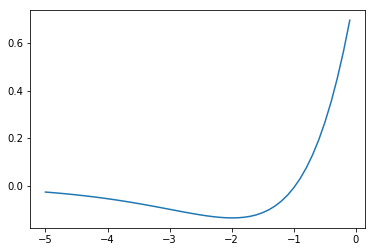

In [22]:
def f(x):
    return x*np.exp(x)+np.sin(np.exp(x))

t1 = np.arange(-5.0, 0.0, 0.1)
plt.plot(t1, f(t1))
plt.show()

### Эксперементы при различных фиксированных $t \in [0,1]$.

In [23]:
def search(f, a, b, t, epsilon):
    c = a + t*(b - a)
    i = 0
    while abs(b - a) > epsilon:
        i = i + 1
        y = a + t*(c - a) 
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = c + t*(b - c) 
            if f(c) <= f(z):
                a = y
                b = z
                c = a + t * (b - a)
            else:
                a = c
                c = z
    return c, i

Проведем по 5 эксперементов для кажого $t$.

In [24]:
a = -5
b = 0
eps = 10**(-7)
for t in np.arange(0.05, 1, 0.05):
    for i in range(0, 5, 1):
        print "t =", t, "N =", search(f, a, b, t, eps)[1], "x_min = ", search(f, a, b, t, eps)[0]

t = 0.05 N = 77 x_min =  -1.99068452679
t = 0.05 N = 77 x_min =  -1.99068452679
t = 0.05 N = 77 x_min =  -1.99068452679
t = 0.05 N = 77 x_min =  -1.99068452679
t = 0.05 N = 77 x_min =  -1.99068452679
t = 0.1 N = 56 x_min =  -1.99068448025
t = 0.1 N = 56 x_min =  -1.99068448025
t = 0.1 N = 56 x_min =  -1.99068448025
t = 0.1 N = 56 x_min =  -1.99068448025
t = 0.1 N = 56 x_min =  -1.99068448025
t = 0.15 N = 41 x_min =  -1.99068449817
t = 0.15 N = 41 x_min =  -1.99068449817
t = 0.15 N = 41 x_min =  -1.99068449817
t = 0.15 N = 41 x_min =  -1.99068449817
t = 0.15 N = 41 x_min =  -1.99068449817
t = 0.2 N = 32 x_min =  -1.99068450116
t = 0.2 N = 32 x_min =  -1.99068450116
t = 0.2 N = 32 x_min =  -1.99068450116
t = 0.2 N = 32 x_min =  -1.99068450116
t = 0.2 N = 32 x_min =  -1.99068450116
t = 0.25 N = 33 x_min =  -1.99068445119
t = 0.25 N = 33 x_min =  -1.99068445119
t = 0.25 N = 33 x_min =  -1.99068445119
t = 0.25 N = 33 x_min =  -1.99068445119
t = 0.25 N = 33 x_min =  -1.99068445119
t = 0.3 N 

Заметим, что число итераций не изменяется в опытах при одинаковом $t$.

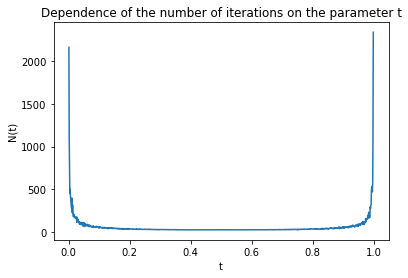

In [25]:
T = np.linspace(0, 1, 1000)[1:-1]
N = np.array([search(f, a, b, t, eps)[1] for t in T])
plt.plot(T, N)
plt.title("Dependence of the number of iterations on the parameter t")
plt.xlabel("t")
plt.ylabel("N(t)")

plt.show()

Рассмотрим значения $N(t)$ в меньшем промежутке.

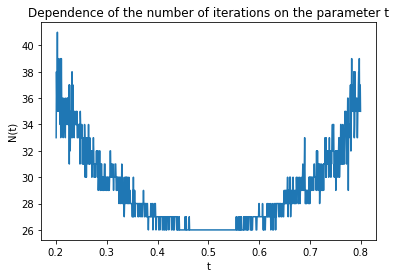

In [26]:
T = np.linspace(0.2, 0.8, 1000)[1:-1]
N = np.array([search(f, a, b, t, eps)[1] for t in T])
plt.plot(T, N)
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title("Dependence of the number of iterations on the parameter t")
plt.show()

### Эксперементы при равновероятном выборе $t \in [0,1]$ на кажом шаге.

In [27]:
def stochastic_search(f, a, b, iter, epsilon, iterations = True):
    t = np.random.rand(1)
    c = a + t*(b - a)
    i = 0
    F = [f(c)]
    if iterations:
        while i < iter:
            t = np.random.rand(1)
            i = i + 1
            y = a + t*(c - a) 
            if f(y) <= f(c):
                b = c
                c = y
            else:
                z = c + t*(b - c) 
                if f(c) <= f(z):
                    a = y
                    b = z
                    c = a + t * (b - a)
                else:
                    a = c
                    c = z
            F.append(f(c))
        return c, i, np.array(F)
    else:
        while abs(b-a) >= epsilon:
            t = np.random.rand(1)
            i = i + 1
            y = a + t*(c - a) 
            if f(y) <= f(c):
                b = c
                c = y
            else:
                z = c + t*(b - c) 
                if f(c) <= f(z):
                    a = y
                    b = z
                    c = a + t * (b - a)
                else:
                    a = c
                    c = z
        return c, i, f(c)

<Container object of 3 artists>

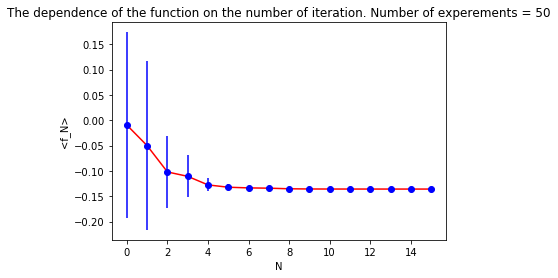

In [28]:
iter = 15
N_exp = 50
F = np.zeros((N_exp, iter+1))
for i in range(N_exp):
    F[i, :] = stochastic_search(f, a, b, iter, eps, True)[2].ravel()
F_mean = np.array([F[:,i].mean() for i in range(iter+1)])
F_err = np.array([F[:,i].std() for i in range(iter+1)])
iterations = np.arange(0, iter+1)
plt.xlabel("N")
plt.ylabel("<f_N>")
plt.title("The dependence of the function on the number of iteration. Number of experements = 50")
plt.plot(iterations, F_mean, c = 'red')
plt.errorbar(iterations, F_mean, fmt='bo', yerr=F_err)

<Container object of 3 artists>

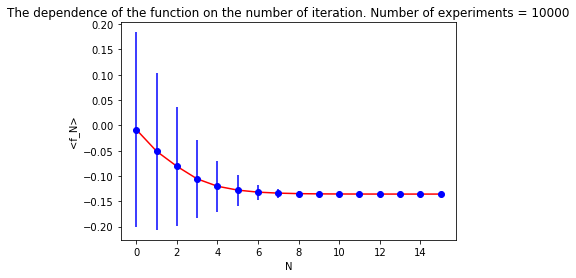

In [29]:
iter = 15
N_exp = 10000
F = np.zeros((N_exp, iter+1))
for i in range(N_exp):
    F[i, :] = stochastic_search(f, a, b, iter, eps, True)[2].ravel()
F_mean = np.array([F[:,i].mean() for i in range(iter+1)])
F_err = np.array([F[:,i].std() for i in range(iter+1)])
iterations = np.arange(0, iter+1)
plt.xlabel("N")
plt.ylabel("<f_N>")
plt.title("The dependence of the function on the number of iteration. Number of experiments = 10000")
plt.plot(iterations, F_mean, c = 'red')
plt.errorbar(iterations, F_mean, fmt='bo', yerr=F_err)

При случайном равновероятном выборе $t$ на каждом шаге мы получили, что при номере итераций больше $10$ значения функции становятся практически одинаковыми. Это объясняется тем, что алгоритм сходится независимо от $t \in [0,1]$.

При небольшом числе итераций функция убывает не монотонно, как раз из-за случайности. Но при выборе большого числа итераций, как $N=10000$, монотонность среднего значения появляется.

### Сравнение по числу итераций 

In [30]:
N_exp = 100
I = np.zeros(N_exp)
for i in range(N_exp):
    I[i] = stochastic_search(f, a, b, iter, eps, False)[1]
i_mean = np.mean(I)
print i_mean

39.47


Сравним среднее число итераций $2$-ого алгоритма с числом итераций для каждого $t$ $1$-ого алгоритма.

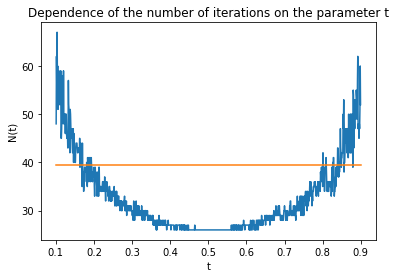

In [31]:
T = np.linspace(0.1, 0.9, 1000)[1:-1]
N = np.array([search(f, a, b, t, eps)[1] for t in T])
I_mean = np.array([i_mean for t in T])
plt.plot(T, N)
plt.plot(T, I_mean)
plt.title("Dependence of the number of iterations on the parameter t")
plt.xlabel("t")
plt.ylabel("N(t)")

plt.show()

Понятно, что при "хорошем" выборе $t$ $1$-ый алгоритм работает лучше. По графику видно, что "хороший" выбор $t$ -- практичеки все $t$ лежащие в интервале $(0.2,0.8)$.

Среднее значение числа итераций $1$-ого алгоритма кажется не имеет особого смысла, т.к. при очень малом и очень большом значении $t$ число итераций становится огромным.

## Задача 3

In [32]:
import numpy as np
def dichotomy(a, b, c, x1, x2, epsilon):
    def f(x):
        return a*x**2+b*x+c
    array_of_5_last_iterations = np.empty([5])
    if x1 >= x2:
        return 'x1 >= x2'
    else:
        x = (x1 + x2)/2.
        while abs(x1-x2) > epsilon:
            y = (x1 + x)/2.
            if f(y) <= f(x):
                x2 = x
                x = y
            else:
                z = (x+x2)/2.
                if f(x) <= f(z):
                    x1 = y
                    x2 = z
                else: 
                    x1 = x
                    x = z
            array_of_5_last_iterations[:4] = array_of_5_last_iterations[1:]
            array_of_5_last_iterations[4] = f(x) 
        #raise NotImplementedError()
        return array_of_5_last_iterations


Пример работы и целевая функция:

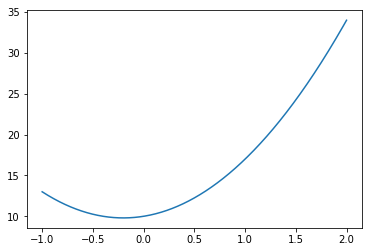

In [42]:
a = 5
b = 2
c = 10
x1 = -1
x2 = 2
X = np.linspace(x1, x2, 1000)
F = np.array([(a*x**2+b*x+c) for x in X])
plt.plot(X, F)

In [43]:
print dichotomy(a, b, c, x1, x2, 10**(-7))

[ 9.8  9.8  9.8  9.8  9.8]


## Задача 4

In [44]:
import numpy as np
def fibonacci(a,b,c,x1,x2, epsilon):
    array_of_5_last_iterations = np.empty([5])
    def f(x):
        return a*x**2+b*x+c
    def fib_numbers(n):
        if n <= 0:
            print "no fibonacci number"
        else:
            if n == 1:
                return [1]
            else:
                res = [1 ,1]
                for i in range(2, n):
                    res.append(res[-2]+res[-1])
                return res
    if x1 >= x2:
        return 'x1 >= x2'
    else:
        n = 1
        while fib_numbers(n)[-1] < (x2-x1)/eps:
            n = n + 1
        n = n + 1
        while True:
            x = x1 + (fib_numbers(n-2)[-1]/(fib_numbers(n)[-1]*1.))*(x2-x1)
            y = x1 + (fib_numbers(n-1)[-1]/(fib_numbers(n)[-1]*1.))*(x2-x1)
            if f(x) > f(y):
                x1 = x
                x = y
                n = n - 1
                y = x1 + (fib_numbers(n-1)[-1]/(fib_numbers(n)[-1]*1.))*(x2-x1)
            else: 
                x2 = y
                y = x
                n = n - 1
                x = x1 + (fib_numbers(n-2)[-1]/(fib_numbers(n)[-1]*1.))*(x2-x1)
            array_of_5_last_iterations[:4] = array_of_5_last_iterations[1:]
            array_of_5_last_iterations[4] = f((x1+x2)/2.)
            if epsilon >= (x2-x1):
                break
        return array_of_5_last_iterations
        
    
    #raise NotImplementedError()

In [45]:
eps = 10**(-7)
print fibonacci(a, b, c, x1, x2, eps)

[ 9.8  9.8  9.8  9.8  9.8]
